In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import keras

In [4]:
# MNIST data can be loaded from the keras library.
from keras.datasets import mnist

def load_data():
  (train_samples,train_labels), (test_samples,test_labels) = mnist.load_data()
  return train_samples, train_labels, test_samples, test_labels

train_samples, train_labels, test_samples, test_labels = load_data()


In [5]:
# check the shape of the data
print(train_samples.shape)
print(train_labels.shape)
print(test_samples.shape)
print(test_labels.shape)

print(train_labels[0:8])

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)
[5 0 4 1 9 2 1 3]


In [6]:
print(np.amax(train_samples))
print(np.amin(train_samples))

255
0


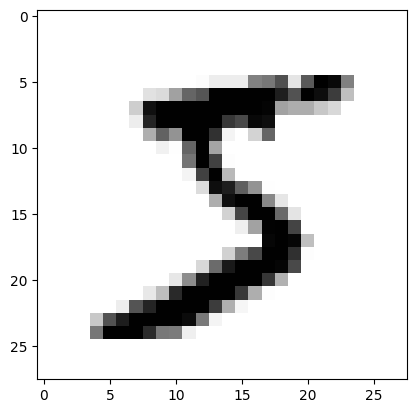

Label of image is 5


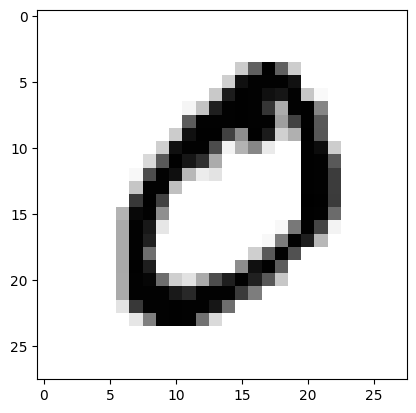

Label of image is 0


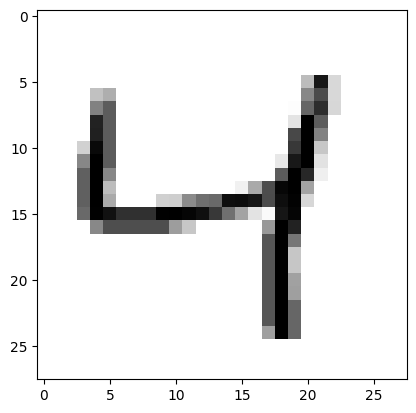

Label of image is 4


In [7]:
for i in range(0,3):
  pixels=train_samples[i]
  plt.imshow(pixels, cmap = plt.cm.binary)
  plt.show()
  print("Label of image is", train_labels[i])

In [8]:
def convert_dtype(x):


    x_float=x.astype('float32')
    return x_float

train_samples = convert_dtype(train_samples)
test_samples = convert_dtype(test_samples)

In [9]:
def normalize(x):
  y = (x - np.min(x))/np.ptp(x)   #ptp function is used to find the range
  return y

train_samples = normalize(train_samples)
test_samples = normalize(test_samples)

In [10]:
# to check if train_samples is normalized or not
np.isclose(np.amax(train_samples), 1)

True

In [11]:
# We need to reshape our train_data to be of shape (samples, height, width, channels) pass to Conv2D layer of keras

def reshape(x):


    x_r=x.reshape(x.shape[0],x.shape[1],x.shape[2],1)
    return x_r

train_samples = reshape(train_samples)
test_samples = reshape(test_samples)

In [12]:
def oneHot(y, Ny):

    import tensorflow
    from keras.utils import to_categorical
    Ny=len(np.unique(y))
    y_oh=to_categorical(y,num_classes=Ny)
    return y_oh

# example
train_labels = oneHot(train_labels, 10)
test_labels = oneHot(test_labels, 10)

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

model = Sequential()
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        18464     
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 10)                184330    
                                                                 
Total params: 203,434
Trainable params: 203,434
Non-trainable params: 0
_________________________________________________________________


In [15]:
results = model.fit(train_samples, train_labels, validation_split = 0.1, epochs=4, batch_size=250)

Epoch 1/4
216/216 [==============================] - 133s 607ms/step - loss: 0.2657 - accuracy: 0.9242 - val_loss: 0.0784 - val_accuracy: 0.9775
Epoch 2/4
216/216 [==============================] - 131s 606ms/step - loss: 0.0683 - accuracy: 0.9795 - val_loss: 0.0580 - val_accuracy: 0.9858
Epoch 3/4
216/216 [==============================] - 119s 549ms/step - loss: 0.0492 - accuracy: 0.9851 - val_loss: 0.0506 - val_accuracy: 0.9868
Epoch 4/4
216/216 [==============================] - 117s 540ms/step - loss: 0.0371 - accuracy: 0.9883 - val_loss: 0.0497 - val_accuracy: 0.9880


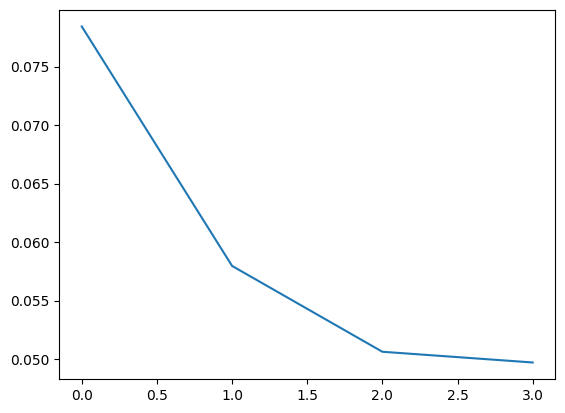

In [16]:
results.history.keys()
import matplotlib.pyplot as plt
plt.plot(range(len(results.history['val_loss'])), results.history['val_loss'])
plt.show()

In [17]:
plot = pd.DataFrame()
plot['Validation Accuracy'] = model.history.history['val_accuracy']
plot['Training Accuracy'] = model.history.history['accuracy']
plot['Validation Loss'] = model.history.history['val_loss']
plot['Training Loss'] = model.history.history['loss']
plot['Epoch'] = plot.reset_index()['index']+1
plot

,Validation Accuracy,Training Accuracy,Validation Loss,Training Loss,Epoch
0,0.977500,0.924167,0.078425,0.265692,1
1,0.985833,0.979519,0.057962,0.068272,2
2,0.986833,0.985130,0.050625,0.049224,3
3,0.988000,0.988333,0.049709,0.037096,4


In [18]:
def predict(x):
    y = model.predict(x)
    return y

predicted_labels_train = predict(train_samples)

1875/1875 [==============================] - 32s 17ms/step


In [19]:
def oneHot_tolabel(y):

    y_b=[]
    from sklearn.preprocessing import LabelEncoder
    labelencoder = LabelEncoder()
    y_b[:, 0] = labelencoder.fit_transform(y_b[:, 0])
    return y_b


In [20]:
def accuracy(x_train, y_train, model):

    loss,acc = model.evaluate(train_samples, train_labels,verbose=0)
    return acc

acc = accuracy(train_samples, train_labels, model)
print('Train accuracy is, ', acc*100, '%')

Train accuracy is,  99.29166436195374 %


In [21]:
def create_confusion_matrix(true_labels, predicted_labels):

    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(true_labels.argmax(axis=1), predicted_labels.argmax(axis=1))
    return cm

cm = create_confusion_matrix((train_labels), (predict(train_samples)))
print(cm)

1875/1875 [==============================] - 31s 16ms/step
[[5913    0    2    1    0    1    2    1    1    2]
 [   0 6717    4    1    3    0    4   13    0    0]
 [   4    8 5917    5    2    0    0   17    2    3]
 [   1    0   10 6098    0    9    0    7    4    2]
 [   1   10    3    0 5808    0    2    3    3   12]
 [   5    2    0   18    1 5375    7    1    9    3]
 [   4    7    0    0    1    5 5901    0    0    0]
 [   0    4    5   14    5    0    0 6230    5    2]
 [  13   12   10    4    6   13   11    4 5766   12]
 [   7    4    2   10   27    6    0   34    9 5850]]


In [22]:
def accuracy(x_test, y_test, model):

    loss,acc = model.evaluate(test_samples, test_labels,verbose=0)
    return acc

acc = accuracy(test_samples, test_labels, model)
print('Test accuracy is, ', acc*100, '%')

Test accuracy is,  98.65000247955322 %


In [23]:
# Final evaluation of the model
scores = model.evaluate(test_samples, test_labels, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

CNN Error: 1.35%
